In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
cfar100 = tf.keras.datasets.cifar100
(X_train, Y_train), (X_test, Y_test) = cfar100.load_data()
# X_train = X_train / 255.0
# X_test = X_test / 255.0

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=24)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
model_output = model.fit(X_train, Y_train, epochs=10)
model.evaluate(X_test, Y_test)

Epoch 1/10


C:\Users\nematizadeh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 [==============================] - 47s 32ms/step - loss: 8.6514 - accuracy: 0.0090
Epoch 2/10
1407/1407 [==============================] - 41s 29ms/step - loss: 4.6058 - accuracy: 0.0092
Epoch 3/10
1407/1407 [==============================] - 45s 32ms/step - loss: 4.6058 - accuracy: 0.0094
Epoch 4/10
1407/1407 [==============================] - 43s 31ms/step - loss: 4.6058 - accuracy: 0.0089
Epoch 5/10
1407/1407 [==============================] - 42s 30ms/step - loss: 4.6058 - accuracy: 0.0089
Epoch 6/10
1407/1407 [==============================] - 42s 30ms/step - loss: 4.6058 - accuracy: 0.0098
Epoch 7/10
1407/1407 [==============================] - 44s 31ms/step - loss: 4.6058 - accuracy: 0.0086
Epoch 8/10
1407/1407 [==============================] - 31s 22ms/step - loss: 4.6058 - accuracy: 0.0091
Epoch 9/10
1407/1407 [==============================] - 30s 21ms/step - loss: 4.6058 - accuracy: 0.0092
Epoch 10/10
157/157 [==============================] - 1s 4ms/step - loss: 

[4.608014106750488, 0.007199999876320362]

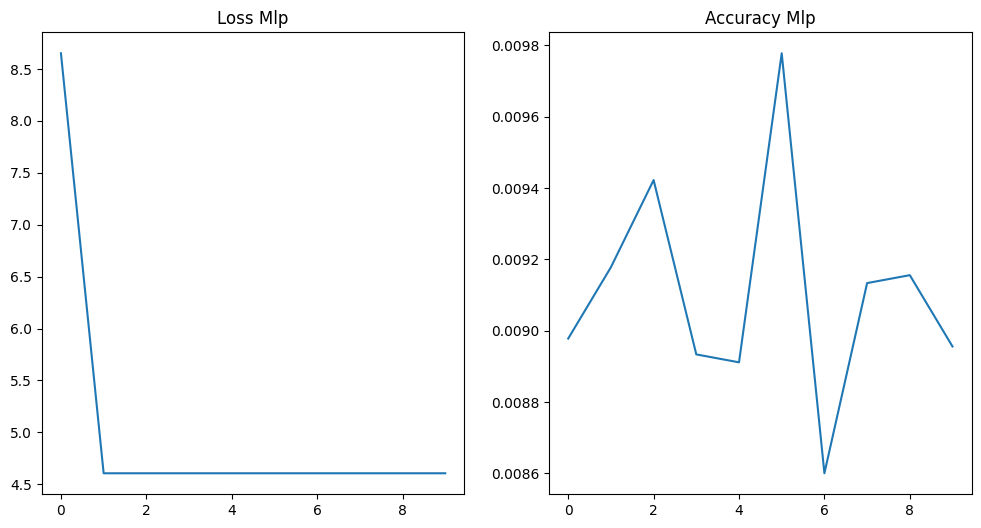

In [8]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(model_output.history['loss'])
ax1.set_title("Loss Mlp")
ax2.plot(model_output.history['accuracy'])
ax2.set_title("Accuracy Mlp")
plt.show()